In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [52]:
water_data=pd.read_csv("ground_water_quality_2020_post.csv")
water_data.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,Unnamed: 8,pH,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,7.10,Post-monsoon 2020,NaN,8.01,...,33.00,171.0,9.0,24.0,72.930,359.876645,3.919146,C3S1,0.602467,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,3.35,Post-monsoon 2020,NaN,7.77,...,13.50,70.0,3.0,16.0,53.482,259.909539,1.887814,C3S1,-0.198191,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,5.05,Post-monsoon 2020,NaN,8.21,...,10.50,65.0,3.0,16.0,48.620,239.917763,1.824544,C2S1,0.001645,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,2.10,Post-monsoon 2020,NaN,8.3,...,7.25,31.0,1.0,16.0,29.172,159.950658,1.065714,C2S1,-0.199013,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,1.38,Post-monsoon 2020,NaN,7.67,...,14.50,129.0,2.0,32.0,5.000,82.878289,6.160862,C2S1,3.742434,U.S.


In [53]:
water_data.columns


Index(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl',
       'season', 'Unnamed: 8', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F',
       'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification',
       'RSC  meq  / L', 'Classification.1'],
      dtype='object')

In [54]:
water_data.shape

(368, 27)

In [55]:
water_data.dtypes


sno                   int64
district             object
mandal               object
village              object
lat_gis             float64
long_gis            float64
gwl                 float64
season               object
Unnamed: 8          float64
pH                   object
E.C                   int64
TDS                 float64
CO3                 float64
HCO3                  int64
Cl                    int64
F                   float64
NO3                 float64
SO4                 float64
Na                  float64
K                   float64
Ca                  float64
Mg                  float64
T.H                 float64
SAR                 float64
Classification       object
RSC  meq  / L       float64
Classification.1     object
dtype: object

In [56]:
water_data.info()
water_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               368 non-null    int64  
 1   district          368 non-null    object 
 2   mandal            368 non-null    object 
 3   village           368 non-null    object 
 4   lat_gis           368 non-null    float64
 5   long_gis          368 non-null    float64
 6   gwl               365 non-null    float64
 7   season            368 non-null    object 
 8   Unnamed: 8        0 non-null      float64
 9   pH                368 non-null    object 
 10  E.C               368 non-null    int64  
 11  TDS               368 non-null    float64
 12  CO3               368 non-null    float64
 13  HCO3              368 non-null    int64  
 14  Cl                368 non-null    int64  
 15  F                 368 non-null    float64
 16  NO3               368 non-null    float64
 1

,sno,lat_gis,long_gis,gwl,Unnamed: 8,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSC meq / L
count,368.000000,368.000000,368.000000,365.000000,0.0,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,188.994565,17.708602,78.796666,5.286329,NaN,1414.698370,905.406957,5.337049,310.896739,205.625000,1.017927,80.519942,28.328668,124.272500,7.351766,89.611957,51.553804,435.908512,2.713371,-2.390674
std,109.991503,0.852252,0.817758,4.849759,NaN,1000.936468,640.599340,14.120556,135.987699,244.240781,0.801420,118.292468,49.849863,120.573107,21.691833,75.398777,45.449022,311.625184,2.877510,6.026669
min,1.000000,15.896441,77.444000,0.170000,NaN,261.000000,167.040000,0.000000,40.000000,10.000000,0.043100,0.097438,3.000000,6.000000,0.100000,1.200000,4.862000,59.983553,0.194454,-59.584539
25%,93.750000,17.138083,78.189800,2.120000,NaN,782.000000,500.480000,0.000000,220.000000,60.000000,0.510000,16.387300,12.000000,51.952500,2.000000,40.000000,24.310000,239.973273,1.245265,-3.597985
50%,188.500000,17.632227,78.594264,3.570000,NaN,1174.500000,751.680000,0.000000,305.000000,130.000000,0.840000,39.728130,20.000000,86.000000,3.270000,72.000000,43.758000,379.876645,1.950485,-0.998931
75%,284.250000,18.360739,79.359912,7.040000,NaN,1632.000000,1044.480000,0.000000,390.000000,250.000000,1.260000,92.777484,31.250000,153.800000,5.922500,112.000000,63.206000,519.891036,3.141792,0.000576
max,379.000000,19.730555,80.920000,36.550000,NaN,9499.000000,6079.360000,90.000000,1070.000000,2480.000000,7.700000,1028.000000,860.000000,748.100000,354.600000,640.000000,457.028000,3479.226974,31.435063,18.200822


In [57]:
water_data.duplicated().any()

np.False_

In [59]:
water_data.isnull().sum()

sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                   3
season                0
Unnamed: 8          368
pH                    0
E.C                   0
TDS                   0
CO3                   0
HCO3                  0
Cl                    0
F                     0
NO3                   0
SO4                   0
Na                    0
K                     0
Ca                    0
Mg                    0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64

In [61]:
null_df= water_data.isnull().sum().reset_index()
null_df.columns = ['Columns', 'Null_count']
null_df['%miss_value'] = round(null_df['Null_count']/len(water_data), 2)*100
null_df

,Columns,Null_count,%miss_value
0,sno,0,0.0
1,district,0,0.0
2,mandal,0,0.0
3,village,0,0.0
4,lat_gis,0,0.0
5,long_gis,0,0.0
6,gwl,3,1.0
7,season,0,0.0
8,Unnamed: 8,368,100.0
9,pH,0,0.0


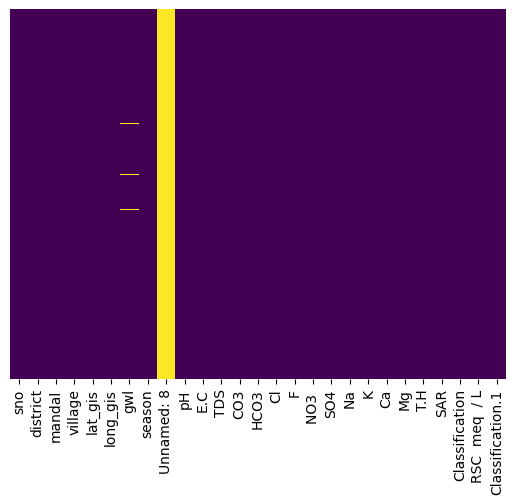

In [62]:
sns.heatmap(water_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [83]:
water_data['pH'].plot(kind='hist')
plt.show()

TypeError: no numeric data to plot

<Axes: ylabel='Frequency'>

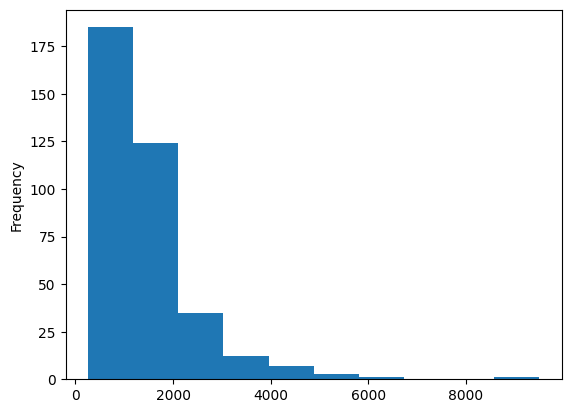

In [65]:
water_data['E.C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

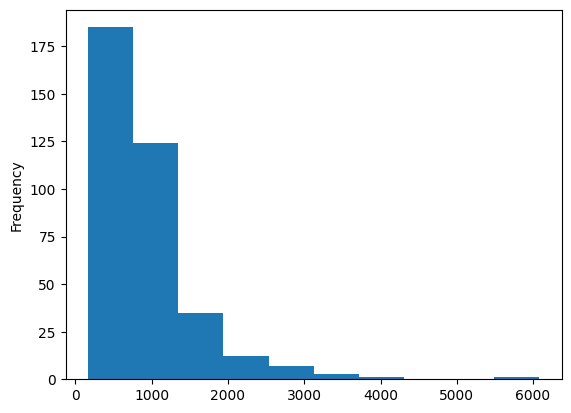

In [66]:
water_data['TDS'].plot(kind='hist')

<Axes: ylabel='Frequency'>

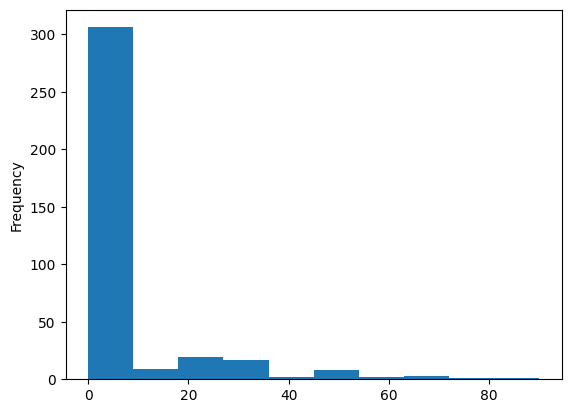

In [67]:
water_data['CO3'].plot(kind='hist')

<Axes: ylabel='Frequency'>

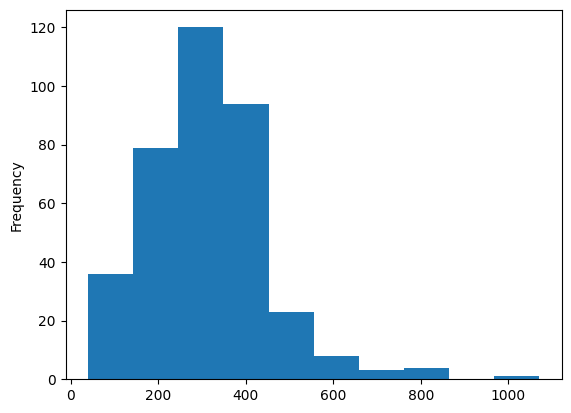

In [68]:
water_data['HCO3'].plot(kind='hist')

<Axes: ylabel='Frequency'>

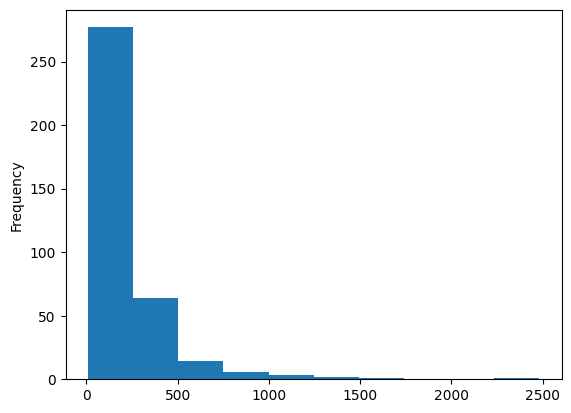

In [69]:
water_data['Cl'].plot(kind='hist')

<Axes: ylabel='Frequency'>

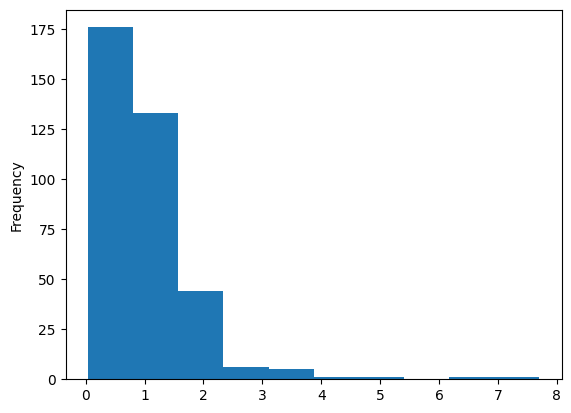

In [70]:
water_data['F'].plot(kind='hist')

<Axes: ylabel='Frequency'>

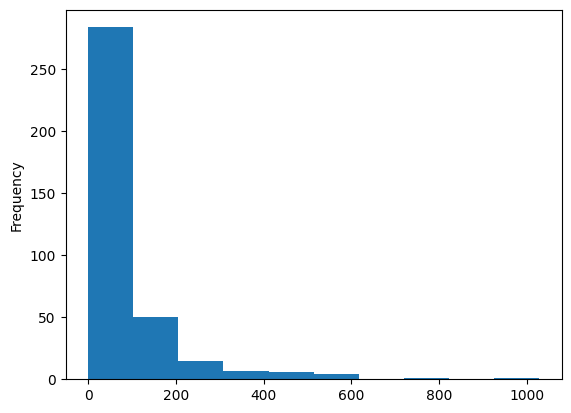

In [84]:
water_data['NO3 '].plot(kind='hist')

<Axes: ylabel='Frequency'>

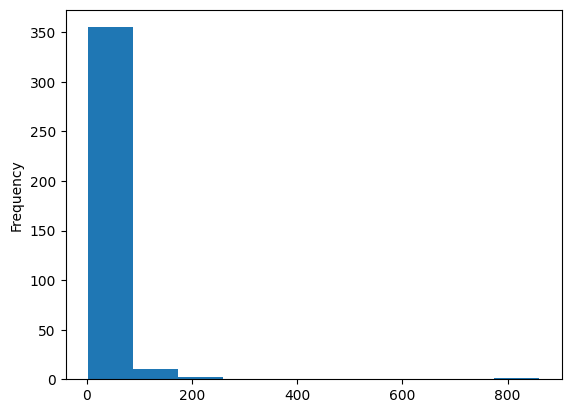

In [73]:
water_data['SO4'].plot(kind='hist')

<Axes: ylabel='Frequency'>

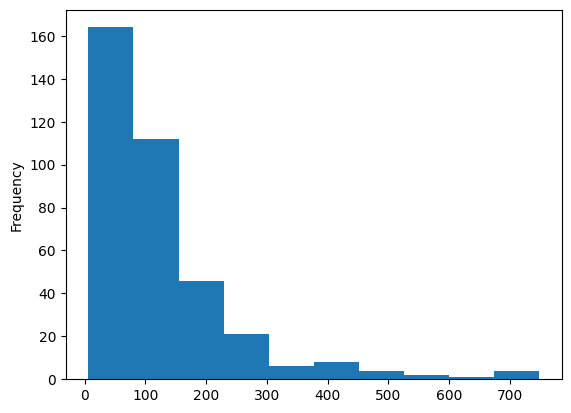

In [74]:
water_data['Na'].plot(kind='hist')

<Axes: ylabel='Frequency'>

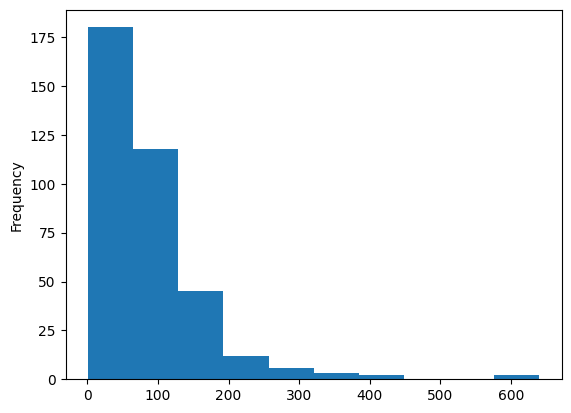

In [75]:
water_data['Ca'].plot(kind='hist')

<Axes: ylabel='Frequency'>

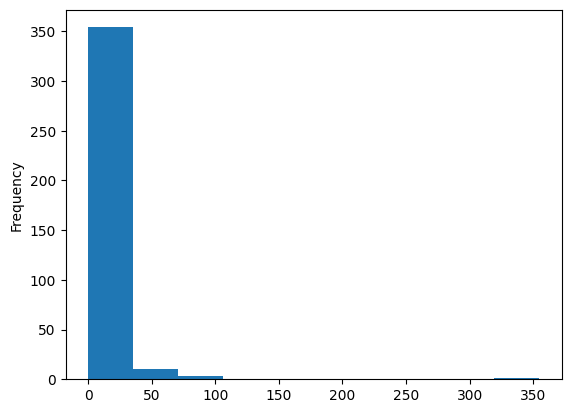

In [76]:
water_data['K'].plot(kind='hist')

<Axes: ylabel='Frequency'>

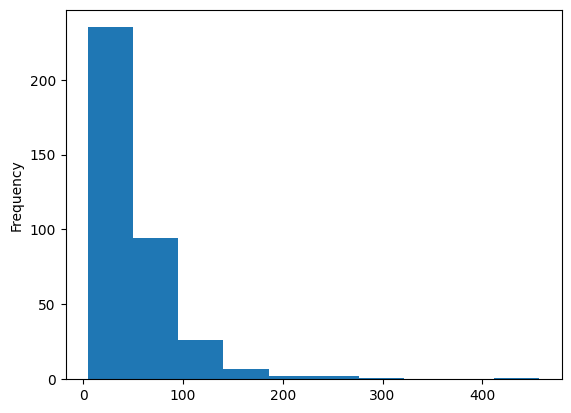

In [77]:
water_data['Mg'].plot(kind='hist')

<Axes: ylabel='Frequency'>

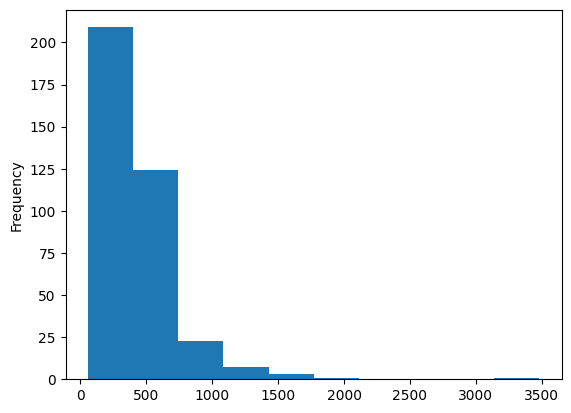

In [79]:
water_data['T.H'].plot(kind='hist')

<Axes: ylabel='Frequency'>

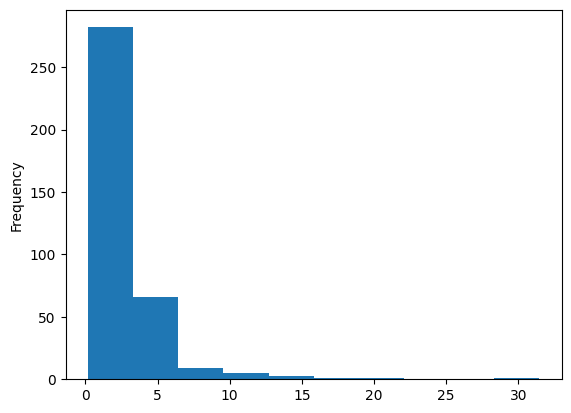

In [80]:
water_data['SAR'].plot(kind='hist')

<Axes: ylabel='Frequency'>

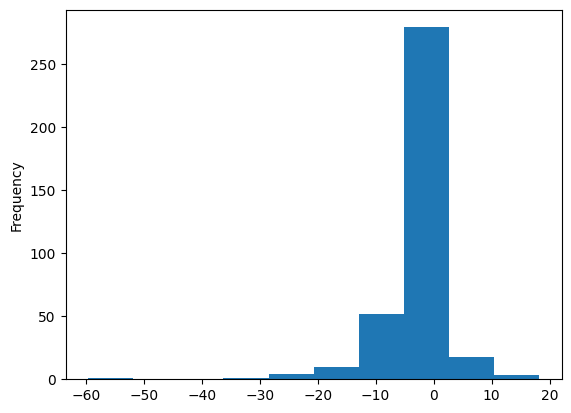

In [82]:
water_data['RSC  meq  / L'].plot(kind='hist')

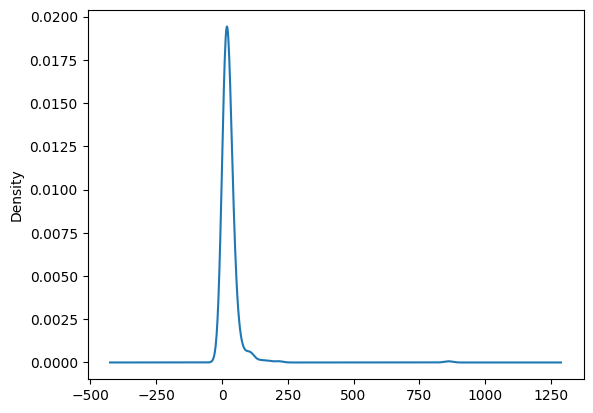

In [94]:
fig = plt.figure()
ax=fig.add_subplot(111)
water_data['SO4'].plot(kind = 'kde', ax= ax)
plt.show()

In [95]:
water_data.isnull().sum()

sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                   3
season                0
Unnamed: 8          368
pH                    0
E.C                   0
TDS                   0
CO3                   0
HCO3                  0
Cl                    0
F                     0
NO3                   0
SO4                   0
Na                    0
K                     0
Ca                    0
Mg                    0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64

CHECK FOR CORRELATION

In [96]:
corr_matrix =water_data.corr()
corr_matrix

ValueError: could not convert string to float: 'ADILABAD'

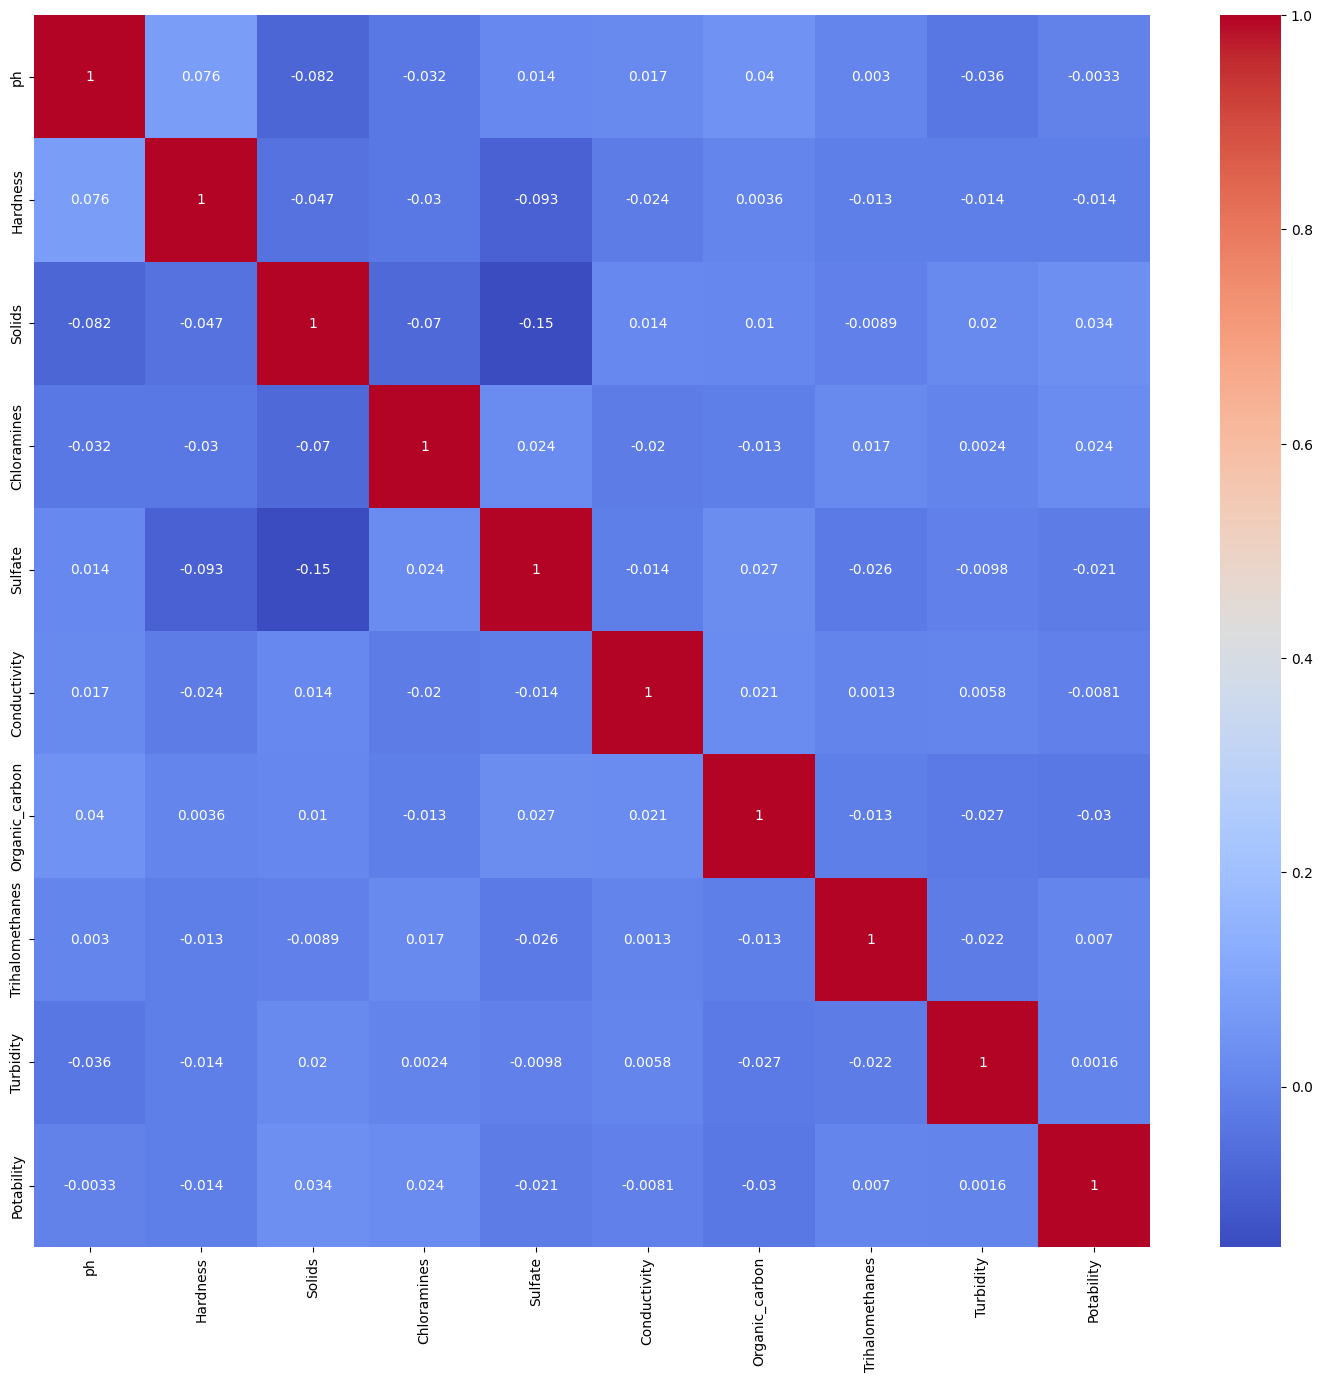

In [93]:
plt.figure(figsize=(18,16))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.show()

In [100]:
corr_matrix1 = corr_matrix.abs()
upper_tri = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape),k=1).astype(np.bool_))
upper_tri

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,NaN,0.075833,0.081884,0.031811,0.014403,0.017192,0.040061,0.002994,0.036222,0.003287
Hardness,NaN,NaN,0.046899,0.030054,0.092766,0.023915,0.003610,0.012690,0.014449,0.013837
Solids,NaN,NaN,NaN,0.070148,0.149840,0.013831,0.010242,0.008875,0.019546,0.033743
Chloramines,NaN,NaN,NaN,NaN,0.023791,0.020486,0.012653,0.016627,0.002363,0.023779
Sulfate,NaN,NaN,NaN,NaN,NaN,0.014059,0.026909,0.025605,0.009790,0.020619
Conductivity,NaN,NaN,NaN,NaN,NaN,NaN,0.020966,0.001255,0.005798,0.008128
Organic_carbon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012976,0.027308,0.030001
Trihalomethanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021502,0.006960
Turbidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001581
Potability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
matrix = np.triu(corr_matrix)
sns.heatmap(water_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket", cbar=False)

ValueError: could not convert string to float: 'ADILABAD'

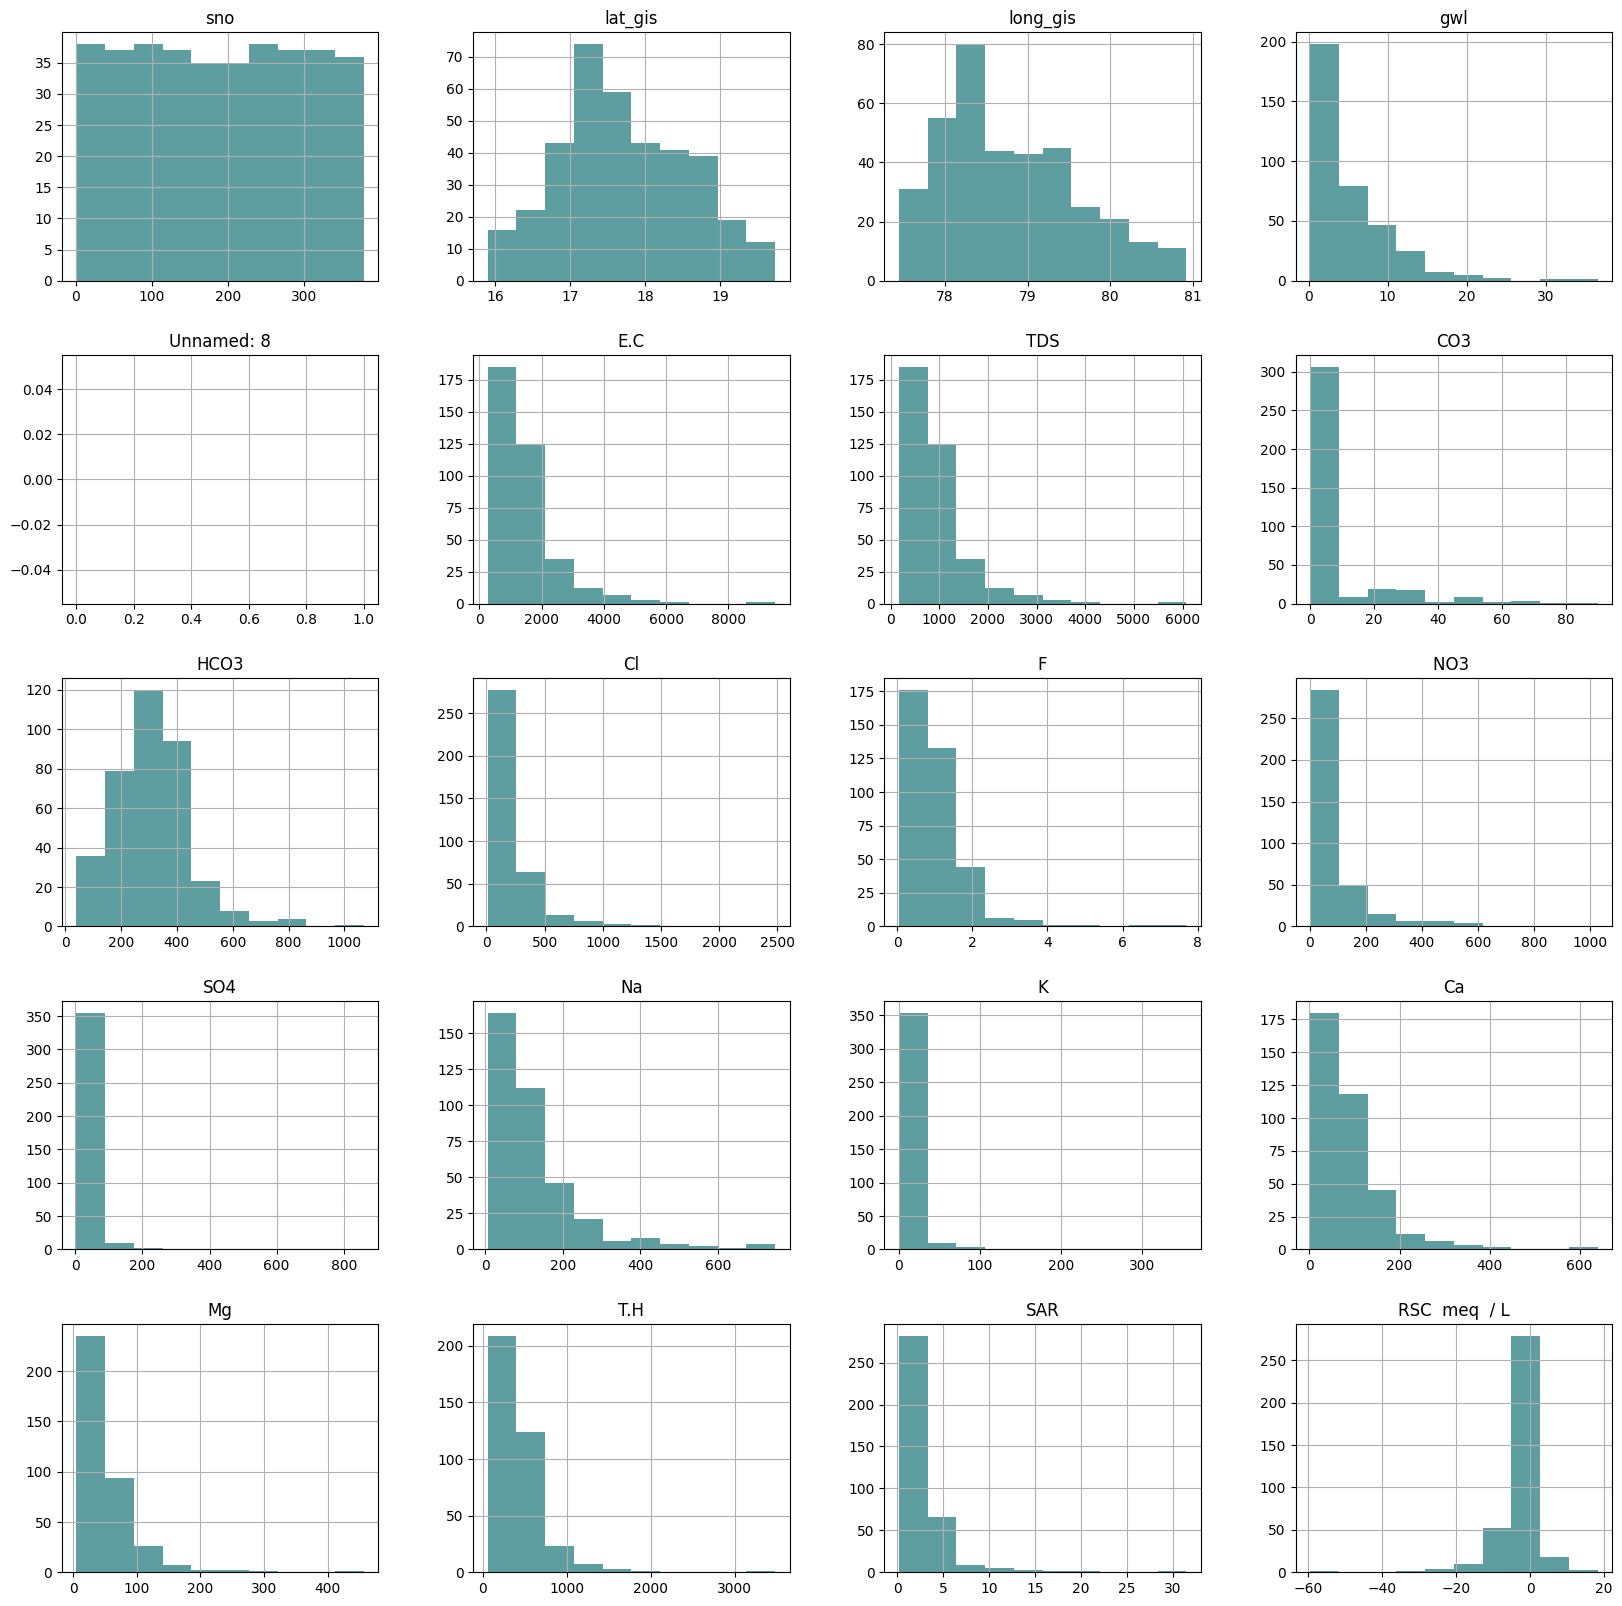

In [99]:
data_hist_plot = water_data.hist(figsize=(20,20),color="#5F9EA0")

In [ ]:
for col in water_data.columns:
    sns.barplot(data=water_data, x=col, kde=True, hue= 'RSC  meq  / L')
    plt.show()

In [ ]:
water_data.groupby('RSC  meq  / L').mean().T

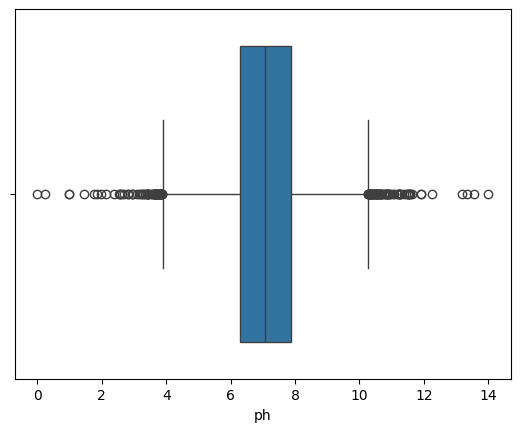

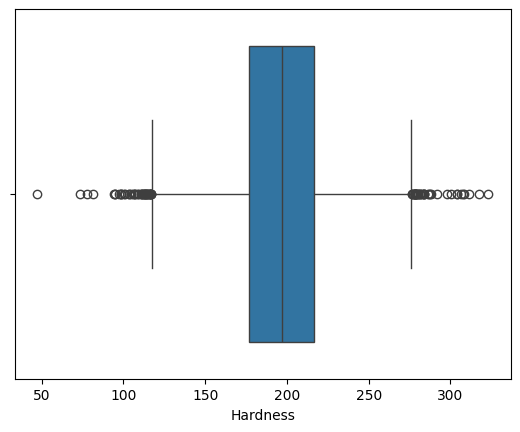

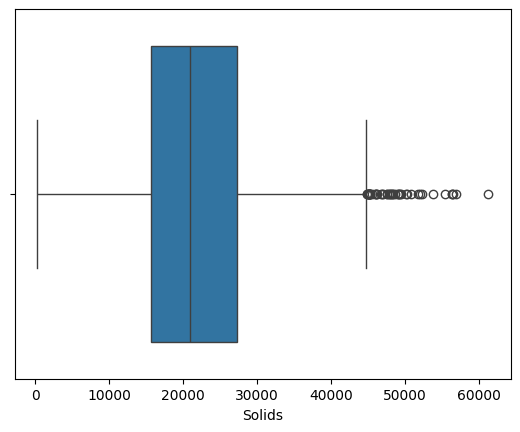

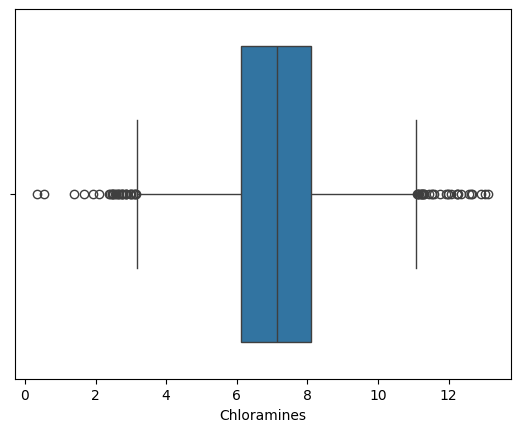

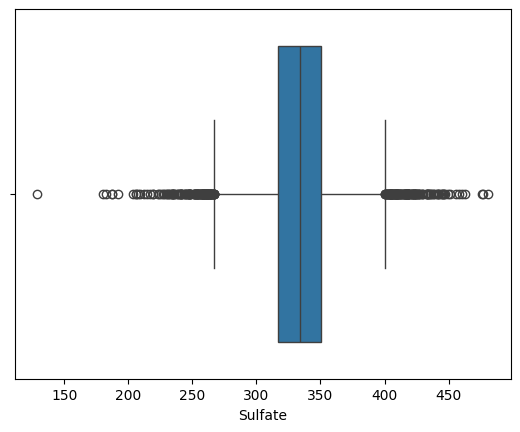

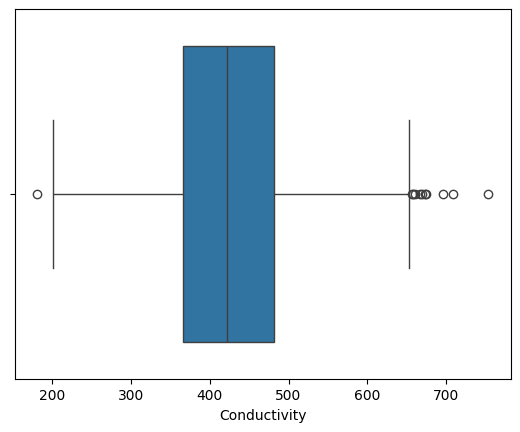

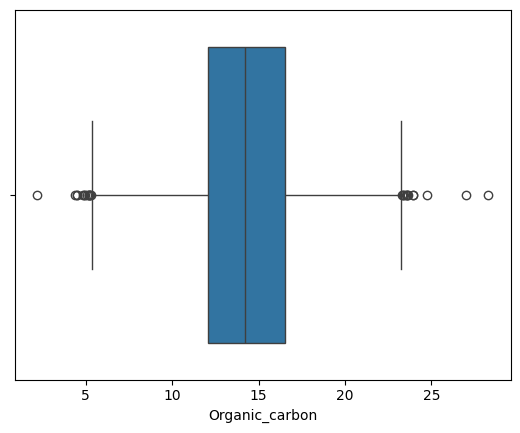

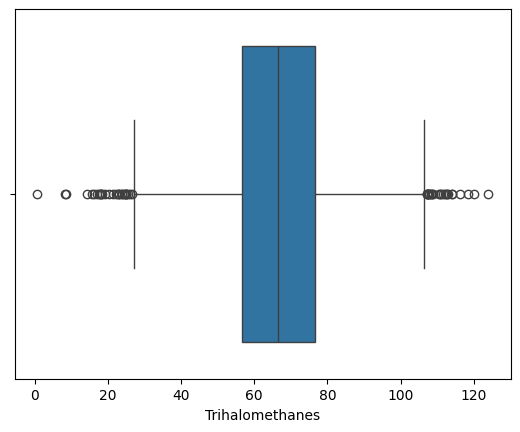

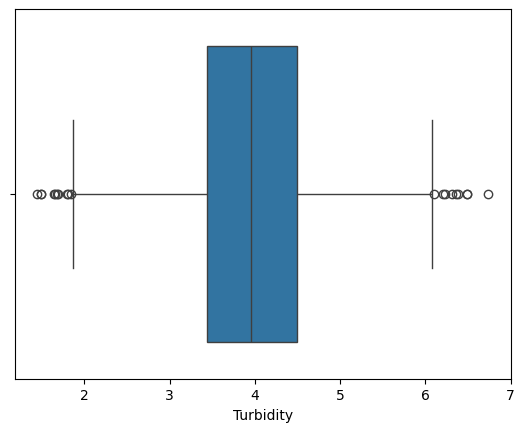

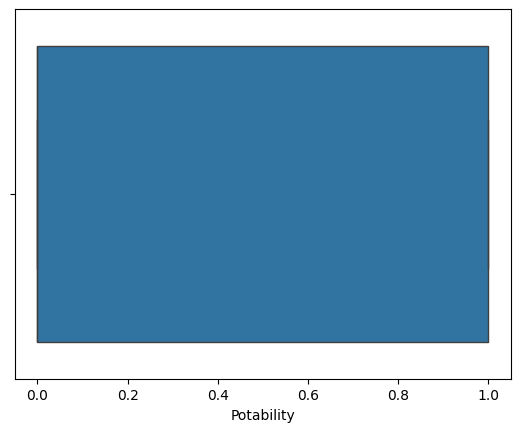

In [38]:
for col in water_data.columns:
    sns.boxplot(data=water_data, x=col)
    plt.show()

Potability
0    1998
1    1278
Name: count, dtype: int64

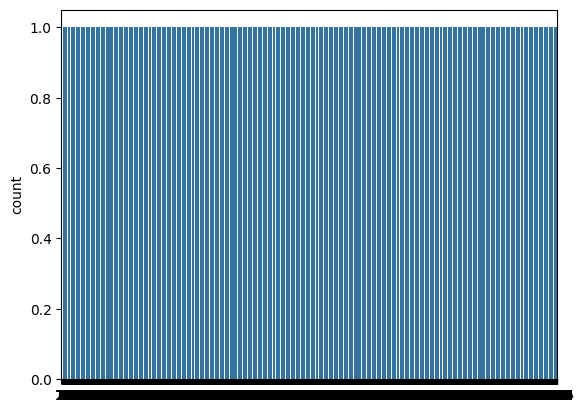

In [44]:
sns.countplot(water_data['Potability'])
water_data['Potability'].value_counts()

DATA PREPROCESSING

In [45]:
X=water_data.drop('Potability', axis=1)
Y=water_data['Potability']

In [41]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [42]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

FEATURE SCALLING

In [47]:
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()

In [50]:
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]],
      shape=(3276, 9))